## FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Preparation and Exploration

In [2]:
df=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\20 Timeseries\exchange_rate.csv')

In [3]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [4]:
df.shape

(7588, 2)

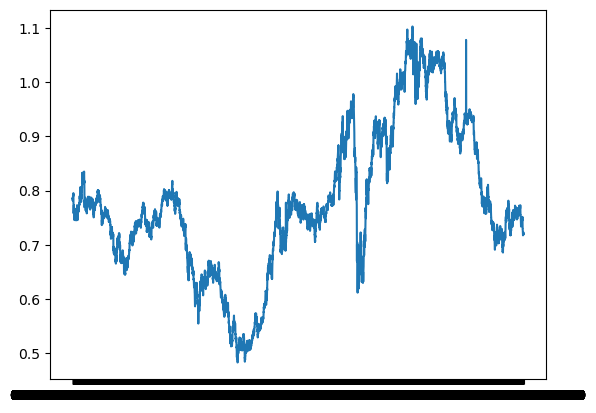

In [5]:
## basic visualization
plt.plot(df['date'],df['Ex_rate'])
plt.show();

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [7]:
## check null values and duplicate rows
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df['date1']=df['date'].str[0:10]

In [10]:
df['date1'].head()

0    01-01-1990
1    02-01-1990
2    03-01-1990
3    04-01-1990
4    05-01-1990
Name: date1, dtype: object

In [11]:
df['date_new']=pd.to_datetime(df.date1,format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

In [12]:
df.head()

,date,Ex_rate,date1,date_new
0,01-01-1990 00:00,0.7855,01-01-1990,1990-01-01
1,02-01-1990 00:00,0.7818,02-01-1990,1990-01-02
2,03-01-1990 00:00,0.7867,03-01-1990,1990-01-03
3,04-01-1990 00:00,0.7860,04-01-1990,1990-01-04
4,05-01-1990 00:00,0.7849,05-01-1990,1990-01-05


In [13]:
df.drop(['date','date1'],axis=1,inplace=True)

In [14]:
df.set_index('date_new',inplace=True)  ## setting date column as index

In [15]:
df.index=pd.to_datetime(df.index)

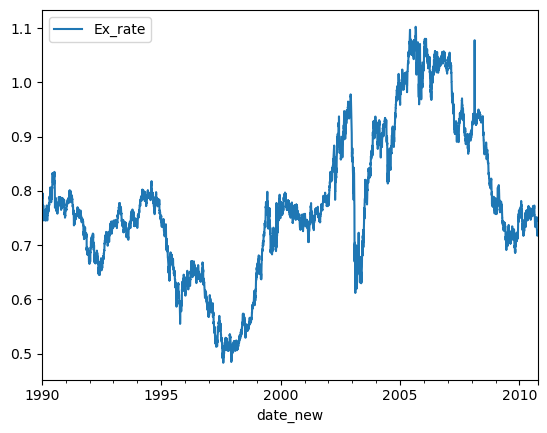

In [16]:
df.index
df.plot();

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
result=seasonal_decompose(df['Ex_rate'],model='multiplicative')  ## to check seasonality

<Axes: xlabel='date_new'>

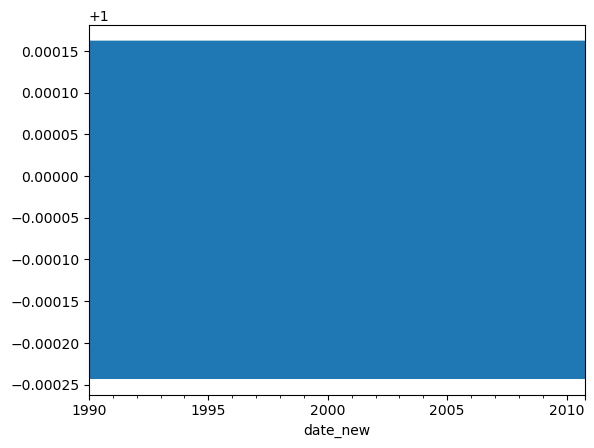

In [19]:
result.seasonal.plot()

<Axes: xlabel='date_new'>

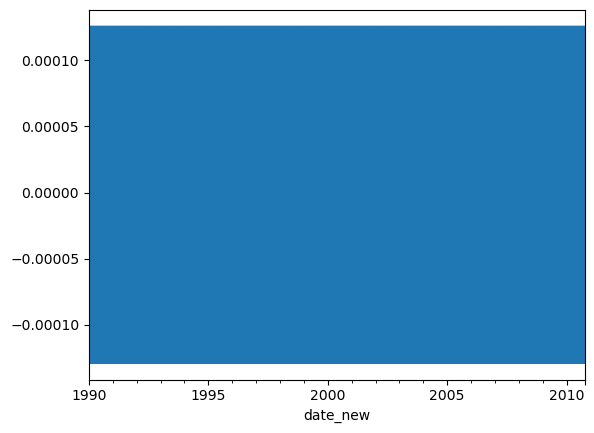

In [20]:
result1=seasonal_decompose(df['Ex_rate'],model='additive')
result1.seasonal.plot()

In [21]:
## plot does show any seasonality in the data

<Axes: xlabel='date_new'>

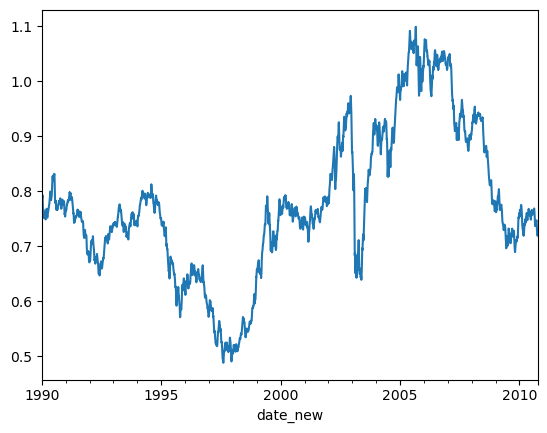

In [22]:
result.trend.plot()  ## checking the trend

In [23]:
## we can see long term variations in the data, indicative of trend

<Axes: xlabel='date_new'>

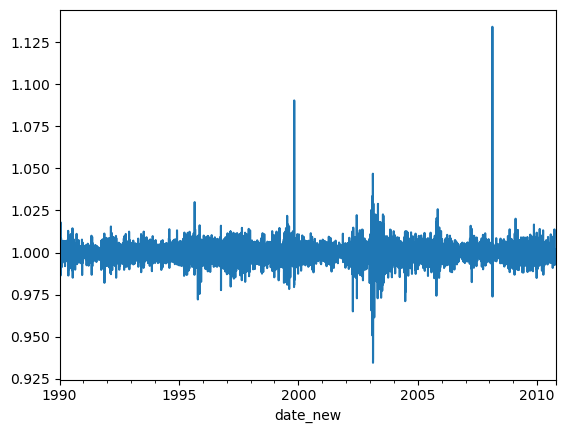

In [24]:
result.resid.plot()  ## checking residual

In [25]:
## plot indicates some disturbance in regular pattern, hence residual present

In [26]:
## This being non seasonal data, we will use ARIMA model

In [27]:
## for forecasting our data should not be stationary or time variant. Now we check this using adfuller test

In [28]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [29]:
## import necessary packages
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [30]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()

    original=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolstd,color='green',label='Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test=adfuller(timeseries)
    my_output=pd.Series(df_test[0:4],index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i]=j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


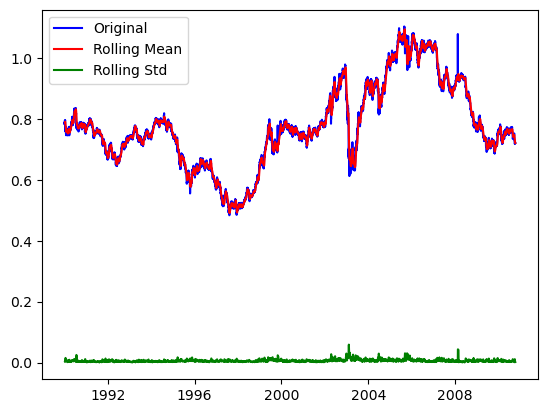

In [31]:
test_stationarity(df['Ex_rate'])

In [32]:
## in adfuller test we consider null hypothesis : data is not stationary, alternate hypothesis : data is stationary
## since as per adfuller test, statistic value lies within the confidence interval of 1%, 5%, 10%, we fail to reject null hypothesis
## our final conclusion is that the given data is not stationary and we can proceed to build forecast model

In [33]:
movingAverage=df['Ex_rate'].rolling(window = 12).mean()

In [34]:
df_diff=df['Ex_rate']-movingAverage

In [35]:
df_diff.head(15)

date_new
1990-01-01         NaN
1990-01-02         NaN
1990-01-03         NaN
1990-01-04         NaN
1990-01-05         NaN
1990-01-06         NaN
1990-01-07         NaN
1990-01-08         NaN
1990-01-09         NaN
1990-01-10         NaN
1990-01-11         NaN
1990-01-12    0.005750
1990-01-13    0.004483
1990-01-14    0.005250
1990-01-15   -0.014083
Name: Ex_rate, dtype: float64

In [36]:
df_diff.dropna(inplace=True)

In [37]:
df_diff.shape

(7577,)

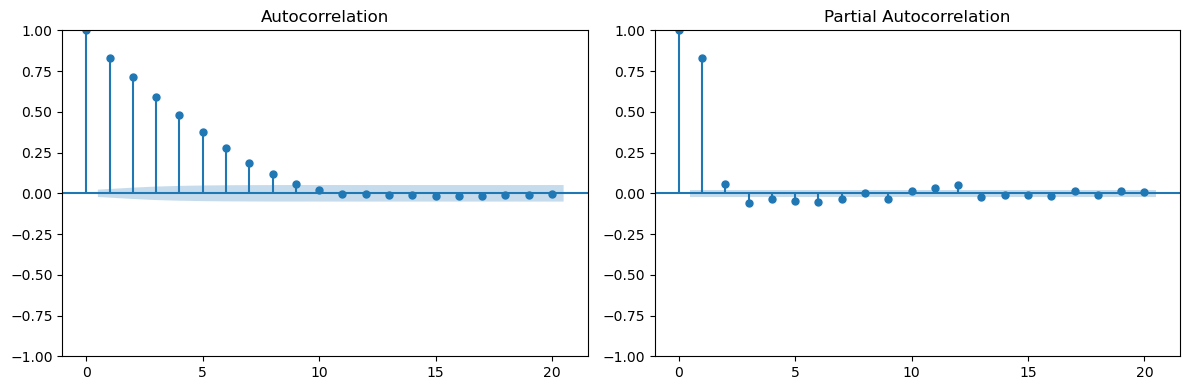

In [38]:
# Plotting the p and q value
import statsmodels.tsa.api as smt
fig,axes=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df_diff,lags=20,ax=axes[0])
smt.graphics.plot_pacf(df_diff,lags=20,ax=axes[1])
plt.tight_layout()

In [39]:
## we leave the first line and then we count the number of points above confidence band
## Autocorrelation plot - 8 points hence q value is 8
## Partial autocorrelation plot - 2 hence p value is 2
## d value is differencing that we have already calculated to create p and q plots (moving average)

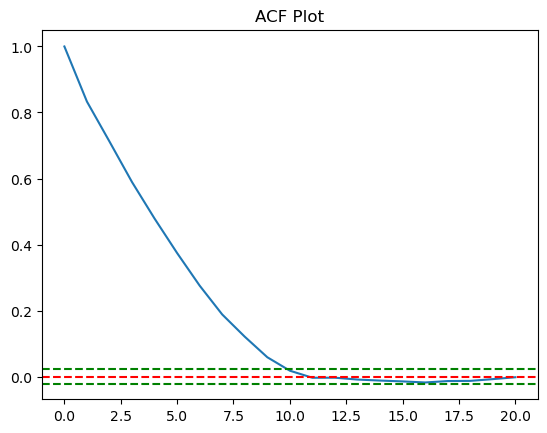

In [40]:
## plotting ACF curve
plt.plot(np.arange(0,21),acf(df_diff,nlags=20))
plt.axhline(y=0,linestyle='--',color='red')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--',color='green')
plt.title('ACF Plot')
plt.show();

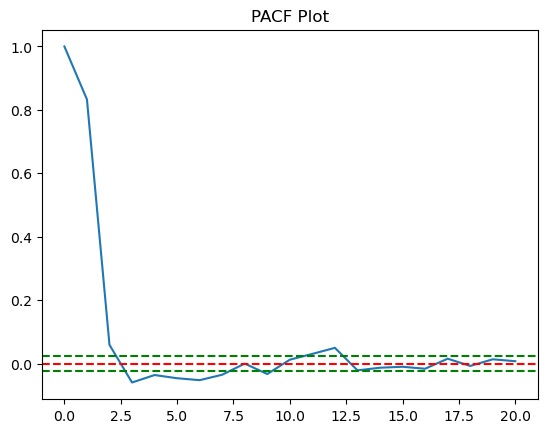

In [41]:
## plotting PACF curve
plt.plot(np.arange(0,21),pacf(df_diff,nlags=20))
plt.axhline(y=0,linestyle='--',color='red')
#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(df_diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(df_diff)),linestyle='--',color='green')
plt.title('PACF Plot')
plt.show();

In [42]:
## Building ARIMA model

In [43]:
!pip install statsmodels

In [44]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Ex_rate'],order=(2,1,8))

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [45]:
result=model.fit()

<Axes: xlabel='date_new'>

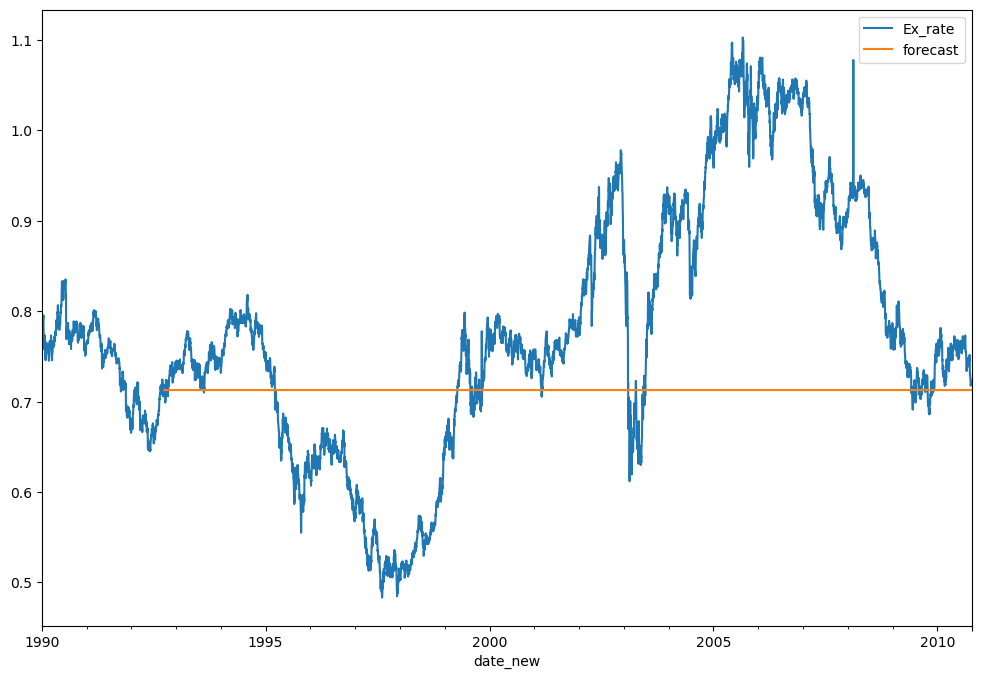

In [46]:
## predicting values and plotting curve
df['forecast']=result.predict(start=1000,end=7587,dynamic=True)
df[['Ex_rate','forecast']].plot(figsize=(12,8))

In [47]:
df['forecast'].tail()

date_new
2010-10-06    0.712763
2010-10-07    0.712763
2010-10-08    0.712763
2010-10-09    0.712763
2010-10-10    0.712763
Name: forecast, dtype: float64

In [48]:
## forecast next 100 values
result.forecast(100)

2010-10-11    0.720784
2010-10-12    0.720896
2010-10-13    0.720883
2010-10-14    0.720792
2010-10-15    0.720856
                ...   
2011-01-14    0.720855
2011-01-15    0.720855
2011-01-16    0.720855
2011-01-17    0.720855
2011-01-18    0.720855
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

In [49]:
## Evaluation

In [50]:
df['Ex_rate']

date_new
1990-01-01    0.785500
1990-01-02    0.781800
1990-01-03    0.786700
1990-01-04    0.786000
1990-01-05    0.784900
                ...   
2010-10-06    0.718494
2010-10-07    0.721839
2010-10-08    0.723197
2010-10-09    0.720825
2010-10-10    0.720825
Name: Ex_rate, Length: 7588, dtype: float64

In [51]:
predicted1=result.predict(start=0,end=7587)

In [52]:
predicted1

1990-01-01    0.000000
1990-01-02    0.785500
1990-01-03    0.782290
1990-01-04    0.786054
1990-01-05    0.786138
                ...   
2010-10-06    0.718787
2010-10-07    0.718593
2010-10-08    0.721403
2010-10-09    0.722929
2010-10-10    0.721126
Freq: D, Name: predicted_mean, Length: 7588, dtype: float64

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(df['Ex_rate'],predicted1)

0.00011720894147556165

## Model Building - Exponential Smoothing

In [55]:
## import simple exponential smoothning
from statsmodels.tsa.api import SimpleExpSmoothing
model=SimpleExpSmoothing(df['Ex_rate'])
model_single_fit=model.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [56]:
## forecast next 1000 values
forecast_single=model_single_fit.forecast(1000)

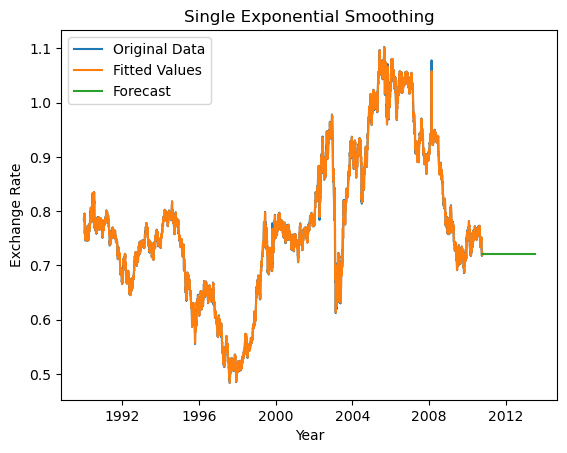

In [57]:
## visualize the forecast
plt.plot(df['Ex_rate'],label='Original Data')
plt.plot(model_single_fit.fittedvalues,label='Fitted Values')
plt.plot(forecast_single,label='Forecast')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show();

In [58]:
## Holt’s method

In [59]:
from statsmodels.tsa.api import Holt
model_double=Holt(df['Ex_rate'])
model_double_fit=model_double.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [60]:
## forecast 10 values
forecast_double=model_double_fit.forecast(10)
print(forecast_double)

2010-10-11    0.720590
2010-10-12    0.720354
2010-10-13    0.720118
2010-10-14    0.719882
2010-10-15    0.719646
2010-10-16    0.719410
2010-10-17    0.719174
2010-10-18    0.718938
2010-10-19    0.718702
2010-10-20    0.718466
Freq: D, dtype: float64


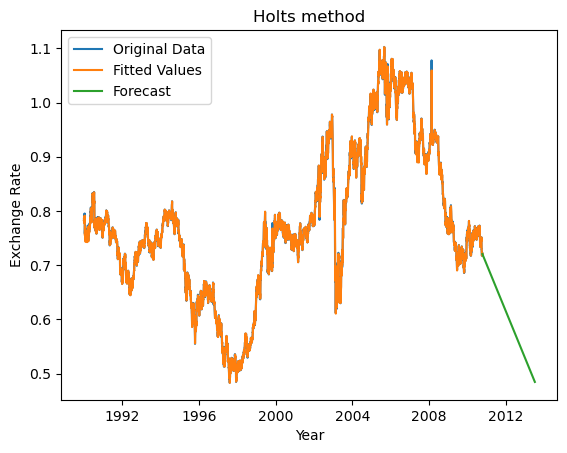

In [61]:
## visualize next 1000 values
forecast_double=model_double_fit.forecast(1000)
plt.plot(df['Ex_rate'],label='Original Data')
plt.plot(model_double_fit.fittedvalues,label='Fitted Values')
plt.plot(forecast_double,label='Forecast')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.title('Holts method')
plt.legend()
plt.show();

In [62]:
## Holt-Winter’s Seasonal Smoothing

In [63]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple=ExponentialSmoothing(df['Ex_rate'],seasonal_periods=12,trend='add',seasonal='add')

# Fit the model to the data
model_triple_fit=model_triple.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [64]:
## forecast 10 values
forecast_triple=model_triple_fit.forecast(10)
print(forecast_triple)

2010-10-11    0.720812
2010-10-12    0.720594
2010-10-13    0.720259
2010-10-14    0.720518
2010-10-15    0.720356
2010-10-16    0.720478
2010-10-17    0.720538
2010-10-18    0.720243
2010-10-19    0.720424
2010-10-20    0.720465
Freq: D, dtype: float64


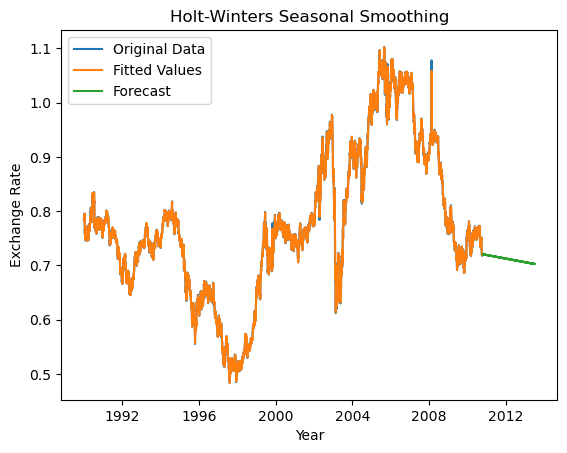

In [65]:
## forecast and visualize next 1000 values
forecast_triple=model_triple_fit.forecast(1000)
plt.plot(df['Ex_rate'],label='Original Data')
plt.plot(model_triple_fit.fittedvalues,label='Fitted Values')
plt.plot(forecast_triple,label='Forecast')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.title('Holt-Winters Seasonal Smoothing')
plt.legend()
plt.show();

In [66]:
## Simple Exp Smoothning best suits time series data with no trend and no seasonality
## Holt’s Linear Smoothing is used for time series data with a trend
## Holt-Winter’s seasonal smoothing is used in cases of trend and seasonality time series data
## our dataset has trend but no seasonality, we should go with Holt's Liner Smoothning

## Evaluation and Comparison

In [73]:
## using Holt's liner model we predict
pred=model_double_fit.fittedvalues

In [74]:
pred

date_new
1990-01-01    0.781800
1990-01-02    0.781344
1990-01-03    0.778072
1990-01-04    0.781969
1990-01-05    0.781902
                ...   
2010-10-06    0.718521
2010-10-07    0.718232
2010-10-08    0.721129
2010-10-09    0.722705
2010-10-10    0.720835
Length: 7588, dtype: float64

In [75]:
mean_squared_error(df['Ex_rate'],pred)

3.623344664795143e-05

In [76]:
## as per the graphical representation, we see that model has shown better results using Holt's Linear smoothing